## Part 1: Web parsing  

In this part, the code for parsing data about political parties participated in the election procedure of Hradec Kralove will be shown. 

In [43]:
# importing necessary modules
import requests
import lxml.html as lh
import pandas as pd

In [44]:
# I will first parse the year 2002 as this webpage is different to others
# Create a page, to handle the contents of the website
page = requests.get('https://www.volby.cz/pls/kv2002/kv1211?xjazyk=CZ&xid=1&xv=1&xdz=3&xnumnuts=5201')

# Store the contents of the website under document
document = lh.fromstring(page.content)

# Parse tables which are stored between <td>..</td> of HTML
l = []
for t in document.xpath('//td')[10:70]:
    l.append(t.text_content())

# cleaning before writing to a df
cleaned = [num.replace(u'\xa0', u'') for num in l[1::5]]

main_df = pd.DataFrame({'Volební strana': l[0::5],
                   'Hlasy abs': cleaned,
                   'Hlasy %': l[2::5]})

main_df['rok'] = 2002

# iterating over years 2006 to 2018
years = [2006, 2010, 2014, 2018]
#Create a  page, to handle the contents of the website
for year in years:
    page = requests.get(f'https://www.volby.cz/pls/kv{year}/kv1111?xjazyk=CZ&xid=1&xdz=3&xnumnuts=5201&xobec=569810&xstat=0&xvyber=0')

    #Store the contents of the website under document
    document = lh.fromstring(page.content)

    # Parse tables which are stored between <td>..</td> of HTML
    # This will create a list of votes in percentages
    hlasy_perc = document.xpath('//div[@id="publikace"]//table[@class="table"]//td[@headers="t2sa3 t2sb4"]/text()')
    # This will create a list of votes
    hlasy_abs = document.xpath('//div[@id="publikace"]//table[@class="table"]//td[@headers="t2sa3 t2sb3"]/text()')
    # This will create a list of political parties
    strany = document.xpath('//div[@id="publikace"]//table[@class="table"]//td[@headers="t2sa2 t2sb2"]/text()')

    # cleaning before writing to df
    hlasy_perc = [num.replace(',', '.') for num in hlasy_perc]
    hlasy_abs = [num.replace(u'\xa0', u'') for num in hlasy_abs]

    df = pd.DataFrame({'Volební strana': strany,
                       'Hlasy abs': hlasy_abs,
                       'Hlasy %': hlasy_perc})

    df['rok'] = year

    main_df = main_df.append(df, ignore_index=True, sort=False)
    
# Cleaning the inconsistancies in data 
main_df['Volební strana'] = main_df['Volební strana'].replace('Česká str.sociálně demokrat.', 'Česká strana sociálně demokratická')
main_df['Volební strana'] = main_df['Volební strana'].replace('Komunistická str.Čech a Moravy', 'Komunistická strana Čech a Moravy')
main_df['Volební strana'] = main_df['Volební strana'].replace('Křesť.demokr.unie-Čs.str.lid.', 'Křesťanská a demokratická unie - Československá strana lidová')

# save data to csv file
main_df.to_csv('political_parties.csv', encoding='utf-8-sig')

B. In this part, the code for parsing data about candidates participated in the election procedure of Hradec Kralove will be shown.

In [45]:
# I will first parse the year 2002 as this webpage is different to others
# Create a  page, to handle the contents of the website
page = requests.get('https://www.volby.cz/pls/kv2002/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=5201&xobec=569810&xstrana=0')

# Store the contents of the website under document
document = lh.fromstring(page.content)

# Parse tables which are stored between <td>..</td> of HTML
l = []
for t in document.xpath('//td'):
    l.append(t.text_content())

# cleaning before writing to df
cleaned = [num.replace(u'\xa0', u'') for num in l[8::12]]
plus_titul = list(zip(l[3::12], l[4::12]))
plus_titul = [i[0] + ' ' + i[1] for i in plus_titul]

main_df = pd.DataFrame({'poř.číslo': l[2::12],
                   'příjmení, jméno, tituly': plus_titul,
                   'věk': l[5::12],
                   'Navrhující strana': l[6::12],
                   'Politická příslušnost': l[7::12],
                   'Hlasy abs': cleaned,
                   'Hlasy %': l[9::12],
                   'Pořadí zvolení': l[10::12],
                   'Mandát': l[11::12]})

main_df['rok'] = 2002

# iterating over years 2006 to 2018
years = [2006, 2010, 2014, 2018]
# Create a  page, to handle the contents of the website
for year in years:
    page = requests.get(f'https://www.volby.cz/pls/kv{year}/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=5201&xobec=569810&xstrana=0')

    # Store the contents of the website under document
    document = lh.fromstring(page.content)

    # Parse tables which are stored between <tr>..</tr> of HTML
    number_candidate = document.xpath('//div[@id="publikace"]//table[@class="table"]//td[@headers = "sa3 sb3"]/text()')
    name = document.xpath('//div[@id="publikace"]//table[@class="table"]//td[@headers="sa3 sb4"]/text()')
    age = document.xpath('//div[@id="publikace"]//table[@class="table"]//td[@headers="sa3 sb5"]/text()')
    political_party = document.xpath('//div[@id="publikace"]//table[@class="table"]//td[@headers="sa4"]/text()')
    political_affiliation = document.xpath('//div[@id="publikace"]//table[@class="table"]//td[@headers="sa5"]/text()')
    votes_num = document.xpath('//div[@id="publikace"]//table[@class="table"]//td[@headers="sa8 sb6"]/text()')
    votes_percent = document.xpath('//div[@id="publikace"]//table[@class="table"]//td[@headers="sa8 sb7"]/text()')
    number_picked = document.xpath('//div[@id="publikace"]//table[@class="table"]//td[@headers="sa9"]/text()')
    mandate = document.xpath('//div[@id="publikace"]//table[@class="table"]//td[@headers="sa10"]/text()')

    # cleaning before writing to df
    votes_percent = [num.replace(',', '.') for num in votes_percent]
    votes_num = [num.replace(u'\xa0', u'') for num in votes_num]

    df = pd.DataFrame({'poř.číslo': number_candidate,
                       'příjmení, jméno, tituly': name,
                       'věk': age,
                       'Navrhující strana': political_party,
                       'Politická příslušnost': political_affiliation,
                       'Hlasy abs': votes_num,
                       'Hlasy %': votes_percent,
                       'Pořadí zvolení': number_picked,
                       'Mandát': mandate})

    df['rok'] = year

    main_df = main_df.append(df, ignore_index=True, sort=False)
main_df.to_csv('candidates.csv', encoding='utf-8-sig')

## Part 2: Vizualizations

In this part, I will introduce all necessary vizualizations for this project.

In [46]:
# importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# reading csv to pandas df
df1 = pd.read_csv('C:\Projects\Weather\python\\candidates.csv', index_col=0)
df2 = pd.read_csv('C:\Projects\Weather\python\\political_parties.csv', index_col=0)

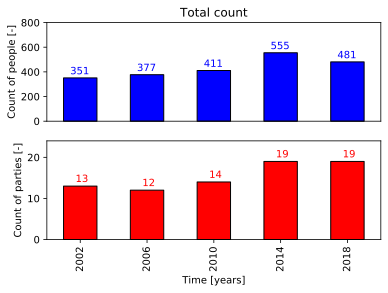

In [48]:
# Časový vývoj (po rocích voleb) počtu lidi (celkove)
fig = plt.figure()
plt.subplot(211)
df1.groupby(['rok'])['Hlasy abs'].count().plot.bar(color='blue', edgecolor='black')
for i,v in enumerate(df1.groupby(['rok'])['Hlasy abs'].count()):
     plt.text(i-0.15, v+30, str(v), color='blue')
plt.ylim([0,800])
plt.xticks([])
plt.xlabel('')
plt.title('Total count')
plt.ylabel('Count of people [-]')

# Časový vývoj (po rocích voleb) počtu kandidujících stran (celkove)
plt.subplot(212)
df = df1.copy()
df = df.groupby(['rok', 'Navrhující strana']).size().reset_index(name='count')
df.groupby('rok')['Navrhující strana'].count().plot.bar(color='red', edgecolor='black')
for i,v in enumerate(df.groupby('rok')['Navrhující strana'].count()):
     plt.text(i-0.07, v+1, str(v), color='red')
plt.ylim([0,24])
plt.ylabel('Count of parties [-]')
plt.xlabel('Time [years]')

plt.show()

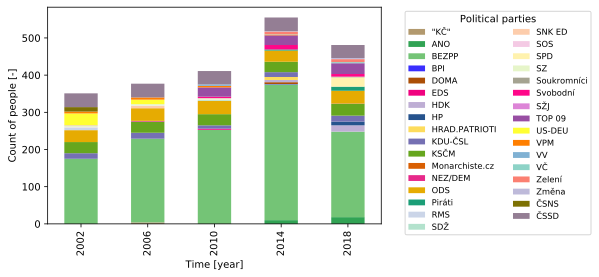

In [49]:
# Časový vývoj (po rocích voleb) počtu lidi po jednotlivých stranách

#removing unnecessary columns
columns_to_drop = ['poř.číslo', 'příjmení, jméno, tituly','Pořadí zvolení','Hlasy %', 'Hlasy abs', 'Mandát', 'Navrhující strana', 'věk']
df = df1.copy()
df = df.drop(columns_to_drop, axis=1)

pivot_df = df.pivot_table(index='rok', columns='Politická příslušnost', aggfunc=len, fill_value=0)

colors = ["#b2996e", "#31A354","#74C476", '#3a2efe', '#ac4f06', '#f0027f', '#beaed4', '#26538d', '#fddc5c',
          '#7570b3', '#66a61e', '#d95f02', '#e7298a', '#e6ab02', '#1b9e77', '#cbd5e8', '#b3e2cd', '#fdcdac',
          '#f4cae4', '#fff2ae', '#e6f5c9', '#a5a391', '#ff0789', '#dd85d7', '#984ea3', '#ffff33', '#ff7f00',
          '#80b1d3', '#8dd3c7', '#fb8072', '#bebada', '#7d7103', '#947e94', "#fd8d49", '#fe0002', '#c1fd95',
         "#ffffcb"]

xs = pivot_df.loc[:,:].plot.bar(stacked=True, color=colors)
plt.legend(loc='upper center',title='Political parties', bbox_to_anchor=(1.35, 1.0), ncol=2, fancybox=True,  fontsize='small')
plt.xlabel('Time [year]')
plt.ylabel('Count of people [-]')
plt.show()

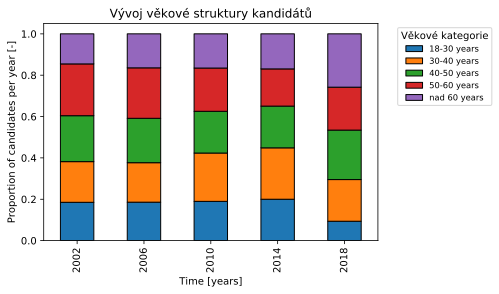

In [50]:
# Věková strukturu kandidátů celkově
%config InlineBackend.figure_format = 'svg'
# creating a function for the determination of aged groups
def calculate_age_category(row):
    category = ''
    if  row['věk'] <= 30:
        category = '18-30 years'
    if row['věk'] > 30 and row['věk'] <= 40:
        category = '30-40 years'
    if row['věk'] > 40 and row['věk'] <= 50:
        category = '40-50 years'
    if row['věk'] > 50 and row['věk'] <= 60:
        category = '50-60 years'
    if row['věk'] > 60:
        category = 'nad 60 years'
    return category

# removing unnecessary columns
df = df1.copy()
columns_to_drop = ['poř.číslo', 'příjmení, jméno, tituly','Pořadí zvolení','Hlasy %', 'Hlasy abs', 'Mandát', 'Navrhující strana', 'Politická příslušnost']
df_age = df.drop(columns_to_drop, axis=1)

# applying function to determine age category
df_age['Věkové kategorie'] = df_age.apply(calculate_age_category, axis=1)

# removing 'vek' column for easier visualizations
df_age = df_age.drop('věk', axis=1)

# Visualizing the results
df_age = df_age.groupby(['rok', 'Věkové kategorie'])['Věkové kategorie'].count()
df_all = df1.groupby(['rok'])['Hlasy abs'].count()
prop = df_age/df_all
prop.unstack('Věkové kategorie').plot.bar(stacked=True, edgecolor='black')
plt.title('Vývoj věkové struktury kandidátů')
plt.ylabel('Proportion of candidates per year [-]')
plt.xlabel('Time [years]')
plt.legend(loc='upper center',title='Věkové kategorie', bbox_to_anchor=(1.2, 1.0), ncol=1, fancybox=True,  fontsize='small')
plt.show()

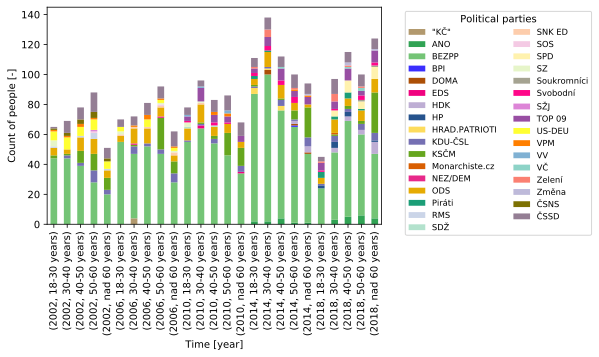

In [51]:
#  Věková strukturu kandidátů za jednotlivé strany a vývoj této struktury během jednotlivých voleb.
%config InlineBackend.figure_format = 'svg'
# removing unnecessary columns
columns_to_drop = ['poř.číslo', 'příjmení, jméno, tituly','Pořadí zvolení','Hlasy %', 'Hlasy abs', 'Mandát', 'Navrhující strana']
df = df1.copy()
df_age2 = df.drop(columns_to_drop, axis=1)

# applying function to determine age category
df_age2['Věkové kategorie'] = df_age2.apply(calculate_age_category, axis=1)

# removing 'vek' column for easier visualizations
df_age2 = df_age2.drop('věk', axis=1)

pivot_df = df_age2.pivot_table(index=['rok', 'Věkové kategorie'], columns='Politická příslušnost', aggfunc=len, fill_value=0)

xs = pivot_df.loc[:,:].plot.bar(stacked=True, color=colors)
plt.legend(loc='upper center',title='Political parties', bbox_to_anchor=(1.35, 1.0), ncol=2, fancybox=True,  fontsize='small')
plt.xlabel('Time [year]')
plt.ylabel('Count of people [-]')
plt.show()

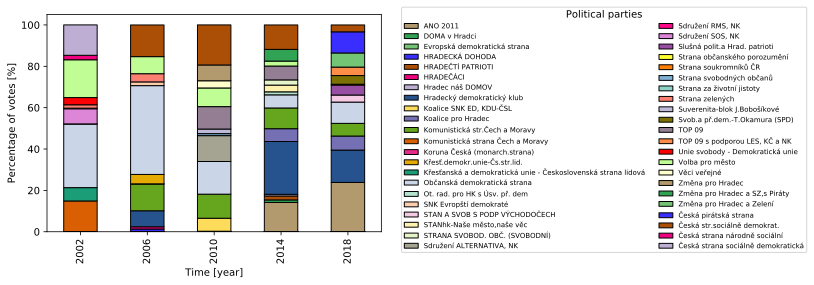

In [52]:
# Časový vývoj volební účasti a volebních výsledků jednotlivých stran
%config InlineBackend.figure_format = 'svg'
# removing unnecessary columns
df = df2.copy()
df = df.drop('Hlasy abs', axis=1)
pivot_df = df.pivot_table(values='Hlasy %',index='rok', columns='Volební strana', fill_value=0)
pivot_df.loc[:,:].plot.bar(stacked=True, color=colors, edgecolor='black')
plt.legend(loc='upper left',title='Political parties', bbox_to_anchor=(1.05, 1.05), ncol=2, fancybox=True,  fontsize='x-small')
plt.xlabel('Time [year]')
plt.ylabel('Percentage of votes [%]')
plt.show()

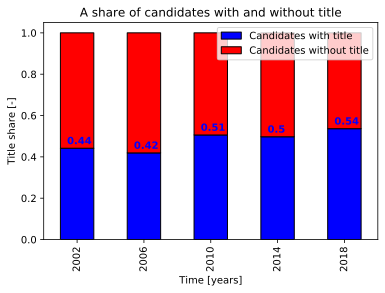

In [53]:
# Časový vývoj podílu kandidujících s titulem a bez titulu
%config InlineBackend.figure_format = 'svg'
# a list of all possible titles
titul_list = ["Ing", "MUDr", "PhDr", "Bc", "BcA.", "BcA", "Mgr", "CSc", 'Prof', 'RNDr', " DrSc", "PaedDr", "JUDr", "RSDr",
                 "PharmDr", "Ph.D", "DiS", "MVDr", 'arch', "Ing.", "MUDr.", "PhDr.", "Bc.", "Mgr.", "CSc.", 'Prof.', 'RNDr.',
                 " DrSc.", "PaedDr.", "JUDr.", "RSDr.", "PharmDr.", "MBA", "Ph.D.", "DiS." "MVDr.", 'arch.', 'M.A.', 'M.P.A.',
                 "MgA.", "MgA", "MDDr.", "MDDr", "RNDr", "ThLic.", "ThLic", "ThDr", "ThDr.", "RTDr.", "RTDr", "ThMgr.",
                "ThMgr", "MSDr.", "MSDr", "ak. soch.", "ak.mal.", "akad. arch.", "DSc.", 'DSc', "Dr", "Dr.", "Th.D", "Th.D."]

# creating a function which would be able to yield if a candidate has a title (return True or False)
def check_persons_degree(row):
    degree = ""
    for i in row['příjmení, jméno, tituly'].split():
        if i in titul_list:
            return True
    return False

# loading df
df = df1.copy()
# apply the function to yield the information about titles
df['titul'] = df.apply(check_persons_degree, axis=1)

# creating a new df
yes = df.groupby(['rok'])['titul'].mean()
no = 1 - df.groupby(['rok'])['titul'].mean()
df_all = pd.concat([yes, no], axis=1)

# plotting data
df_all.plot.bar(stacked=True, color=['b','r'], edgecolor='black')
plt.ylabel('Title share [-]')
plt.xlabel('Time [years]')
for i, v in enumerate(yes):
    plt.text(i-0.15, v+0.02, str(round(v, 2)), color='blue', fontweight='bold')
plt.legend(['Candidates with title', 'Candidates without title'])
plt.title('A share of candidates with and without title')
plt.show()

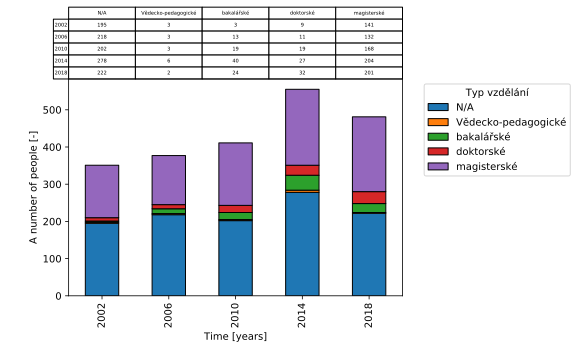

In [54]:
# U titulů se pokuste rozlišit i různé stupně vzdělání: bakalářský, magisterský, doktorský a vyšší
%config InlineBackend.figure_format = 'svg'
# removing unnecessary columns
df1 = df1.copy()
columns_to_drop = ['poř.číslo', 'Pořadí zvolení', 'Hlasy %', 'Hlasy abs', 'Mandát', 'Navrhující strana', 'věk',
                   'Politická příslušnost']
df = df1.drop(columns_to_drop, axis=1)

# create a function which would determine a degree from titles
def determine_the_degree(row):
    bakalarske = ['Bc.', 'Bc', "BcA.", "BcA"]
    magisterske = ["Ing", "Mgr", "Ing.","Mgr.", "MBA", "MUDr.", "MUDr", "MVDr.", "MVDr", "arch.", "arch", "MgA.",
                   "MgA.",
                   "MDDr.", "MDDr.", "JUDr.", "JUDr", "PhDr.", "PhDr", "RNDr.", "RNDr", "PharmDr", "PharmDr.", "ThLic.",
                   "ThLic", "ThDr.", "ThDr", "PaedDr.", "PaedDr", "RCDr", "RCDr.", "RSDr", "RSDr.", "RTDr.", "RTDr",
                   "ThMgr.",
                   "ThMgr", "MSDr.", "MSDr", "ak. soch.", "ak.mal.", "akad. arch."]
    doktorske = ['DSc.', "DSc", "Ph.D", "Ph.D.", "PhD", "CSc.", "CSc", "Dr.", "Dr", "DrSc.", "DrSc", "Th.D", "Th.D."]
    vedecke = ["odb. as.", "as.", 'Prof.', 'Prof', "doc.", "doc", 'prof', 'prof']
    degree_level = 0
    degree = ''
    for i in row['příjmení, jméno, tituly'].split():
        if i in vedecke:
            degree_level = max(4, degree_level)
        if i in doktorske:
            degree_level = max(3, degree_level)
        if i in magisterske:
            degree_level = max(2, degree_level)
        if i in bakalarske:
            degree_level = max(1, degree_level)
        else:
            degree = 'N/A'
    if degree_level == 4:
        degree = 'Vědecko-pedagogické'
    if degree_level == 3:
        degree = 'doktorské'
    if degree_level == 2:
        degree = 'magisterské'
    if degree_level == 1:
        degree = 'bakalářské'
    return degree

# apply this function to the df
df['Vzdělání'] = df.apply(determine_the_degree, axis=1)

'''
# plot how degree changes over years
df.groupby(['rok', 'Vzdělání'])['Vzdělání'].count().unstack('Vzdělání').plot.bar(stacked=True, edgecolor='black')
plt.legend(df.groupby(['rok', 'Vzdělání'])['Vzdělání'].count().unstack('Vzdělání'), title='Typ vzdělání',
          loc='upper left', bbox_to_anchor=(1.05, 1.00), ncol=1, fancybox=True)
plt.ylabel('A number of people [-]')
plt.xlabel('Time [years]')
plt.show()
'''

groupby_t = df.groupby(['rok', 'Vzdělání'])['Vzdělání'].count().unstack('Vzdělání')

groupby_t.plot.bar(stacked=True, edgecolor='black')
plt.legend(groupby_t, title='Typ vzdělání',
          loc='upper left', bbox_to_anchor=(1.05, 1.00), ncol=1, fancybox=True)
plt.ylabel('A number of people [-]')
plt.xlabel('Time [years]')

plt.table(cellText=groupby_t.values,colWidths = [0.20]*len(groupby_t.columns),
          rowLabels=groupby_t.index,
          colLabels=groupby_t.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='top').set_fontsize(20)

fig = plt.gcf()
plt.show()

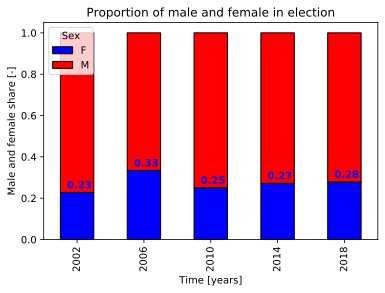

In [55]:
# Zkuste odhadnout i podíl žen na kandidátkách
%config InlineBackend.figure_format = 'svg'
# removing unnecessary columns
df1 = df1.copy()
columns_to_drop = ['poř.číslo','Pořadí zvolení','Hlasy %', 'Hlasy abs', 'Mandát', 'Navrhující strana', 'věk', 'Politická příslušnost']
df = df1.drop(columns_to_drop, axis=1)

# creating a function which would be able to yield titles from 'příjmení, jméno, tituly' column
def check_persons_sex(row):
    sex = ""
    for i in row['příjmení, jméno, tituly'].split()[:1]:
        if i.endswith('á'):
            sex = 'F'
        else:
            sex = 'M'
    return sex

# apply the function to yield the information about titles
df['pohlaví'] = df.apply(check_persons_sex, axis=1)

df = df.drop('příjmení, jméno, tituly', axis=1)

df = df.groupby(['rok', 'pohlaví'])['pohlaví'].count()
df_all = df1.groupby(['rok'])['Hlasy abs'].count()
prop = df/df_all
prop.unstack('pohlaví').plot.bar(stacked=True, color=['b','r'], edgecolor='black')
plt.ylabel('Male and female share [-]')
plt.xlabel('Time [years]')
plt.legend(['F', 'M'], loc='upper left', title='Sex')
for i,v in enumerate(prop.to_list()[0::2]):
     plt.text(i-0.15, v+0.02, str(round(v, 2)), color='blue', fontweight='bold')
plt.title('Proportion of male and female in election')
plt.show()


In [68]:
# Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách.
# Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.

# creating a function which would be able to yield 'příjmení, jméno' from 'příjmení, jméno, tituly' column
def yield_name_surname(row):
    var = ''
    for i in row['příjmení, jméno, tituly'].split():
        var = ' '.join(row['příjmení, jméno, tituly'].split()[:2])
    return var

# creating a function which would be able to yield rok narozeni from rok and vek
def determine_the_year_of_birth(row):
    return row['rok'] - row['věk']

df1 = df1.copy()
styles = dict(selector="th", props=[('text-align', 'center')])
# apply the function to yield the information about 'rok narozeni' and w/o title
df1['příjmení, jméno'] = df1.apply(yield_name_surname, axis=1)
df1['rok narození'] = df1.apply(determine_the_year_of_birth, axis=1)

columns_to_drop = ['poř.číslo', 'Pořadí zvolení', 'Hlasy %', 'Hlasy abs', 'Mandát', 'Navrhující strana',
                   'Politická příslušnost', 'příjmení, jméno, tituly', 'věk']
df = df1.drop(columns_to_drop, axis=1)

grouped_df = df.groupby(['příjmení, jméno', 'rok narození'])['příjmení, jméno'].count()
grouped_df = grouped_df.sort_values(ascending=False)
#print(grouped_df.head(10))
dictionary = {}
for i in grouped_df.keys()[:10]:
    dictionary[i[0]] = i[1]

top_10 = pd.DataFrame(columns = df1.columns)
for k,v in dictionary.items():
    top_10 = top_10.append(df1[(df1['příjmení, jméno'] == k) & (df1['rok narození'] == v)])

top_10 = top_10.drop(['příjmení, jméno', 'rok narození', 'poř.číslo', 'Politická příslušnost', 'věk', 'Hlasy abs'], axis=1)

top_10.style.set_properties(**{'width':'10em', 'text-align':'center'})\
        .set_table_styles([styles])
display(top_10)

,"příjmení, jméno, tituly",Navrhující strana,Hlasy %,Pořadí zvolení,Mandát,rok
249,Růža Vladislav,NK,2.84,7,,2002
598,Růža Vladislav,NK,2.64,11,-,2006
1004,Růža Vladislav,NK,2.52,15,-,2010
1521,Růža Vladislav,HDK,2.63,11,-,2014
2029,Růža Vladislav,HDK,2.57,17,-,2018
316,Urban Arnošt JUDr.,SOS,3.88,2,*,2002
676,Urban Arnošt JUDr.,SOS,3.65,2,*,2006
1086,Urban Arnošt JUDr.,NK,3.30,5,*,2010
1612,Urban Arnošt JUDr.,HDK,3.00,5,*,2014
2113,Urban Arnošt JUDr.,HDK,2.86,3,-,2018
